In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_bgc = pl.read_csv(
    "../IMGPR_plasmid_data/bgc_not_soil/Network_Annotations_Full.tsv", separator="\t"
).filter(pl.col("BGC").str.starts_with("IMGPR"))

df_bgc.head()

BGC,Accession ID,Description,Product Prediction,BiG-SCAPE class,Organism,Taxonomy
str,str,str,str,str,str,str
"""IMGPR_plasmid_…","""IMGPR_plasmid_…","""IMGPR_plasmid_…","""RiPP-like""","""RiPPs""",null,null
"""IMGPR_plasmid_…","""IMGPR_plasmid_…","""IMGPR_plasmid_…","""NRPS.NRPS-like…","""NRPS""",null,null
"""IMGPR_plasmid_…","""IMGPR_plasmid_…","""IMGPR_plasmid_…","""NRPS.NRP-metal…","""Others""",null,null
"""IMGPR_plasmid_…","""IMGPR_plasmid_…","""IMGPR_plasmid_…","""RRE-containing…","""RiPPs""",null,null
"""IMGPR_plasmid_…","""IMGPR_plasmid_…","""IMGPR_plasmid_…","""resorcinol""","""Others""",null,null


In [3]:
df_imgpr = pl.read_csv(
    "../IMGPR_plasmid_data/bgc_not_soil/IMGPR_plasmid_data_not_soil.tsv", separator="\t"
)

df_imgpr.head()

plasmid_id,ptu,taxon_oid,scaffold_oid,source_type,ecosystem,length,gene_count,genomad_score,putatively_complete,topology,mob_genes,t4cp_genes,t4ss_atpase_genes,other_conjugation_genes,complete_mpf_family,origin_of_transfer,arg_genes,putative_phage_plasmid,host_prediction_method,host_taxonomy,closest_reference,closest_reference_ani_percent,closest_reference_af_percent
str,str,i64,str,str,str,i64,i64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64
"""IMGPR_plasmid_…","""PTU_00000642""",3300007767,"""Ga0105553_1041…","""Metagenome""","""Host-associate…",7567,8,0.9967,"""No""","""Concatemer""","""MOBQ;MOBQ""",null,null,null,null,null,null,"""No""","""CRISPR spacer …","""d__Bacteria;p_…","""NC_016900.1""",91.09,74.93
"""IMGPR_plasmid_…","""PTU_00024993""",3300007257,"""Ga0104149_1027…","""Metagenome""","""Host-associate…",6397,9,0.9967,"""No""","""Linear""","""MOBQ;MOBQ""",null,null,null,null,null,null,"""No""","""CRISPR spacer …","""d__Bacteria;p_…","""NC_016900.1""",90.42,70.8
"""IMGPR_plasmid_…","""PTU_00000171""",3300027606,"""Ga0209370_1008…","""Metagenome""","""Host-associate…",4465,8,0.9967,"""No""","""Linear""",null,null,null,null,null,null,null,"""No""",null,null,"""CP060162.1""",94.92,91.65
"""IMGPR_plasmid_…","""PTU_00000171""",3300030512,"""Ga0268257_1008…","""Metagenome""","""Host-associate…",4465,8,0.9967,"""No""","""Linear""",null,null,null,null,null,null,null,"""No""",null,null,"""CP060162.1""",94.92,91.65
"""IMGPR_plasmid_…","""PTU_00000642""",3300005320,"""Ga0074317_1052…","""Metagenome""","""Host-associate…",3588,6,0.9967,"""Yes""","""Direct termina…","""MOBQ""",null,null,null,null,null,null,"""No""","""CRISPR spacer …","""d__Bacteria;p_…","""NC_016900.1""",87.88,86.2


In [4]:
df_imgpr = df_imgpr.with_columns(
    pl.when(pl.col("ecosystem").str.contains("(?i)Human"))
    .then(pl.lit("Host-associated: Human"))
    .otherwise(
        pl.when(pl.col("ecosystem").str.contains("Host-associated"))
        .then(pl.lit("Host-associated: Other"))
        .otherwise(
            pl.when(pl.col("ecosystem").str.contains("Engineered"))
            .then(pl.lit("Engineered"))
            .otherwise(
                pl.when(pl.col("ecosystem").str.contains("Environmental"))
                .then(
                    pl.col("ecosystem").str.split(";").list.slice(0, 2).list.join(";")
                )
                .otherwise(pl.col("ecosystem").str.split(";").list.get(0))
            )
        )
    )
    .alias("ecosystem_custom")
).with_columns(
    pl.col("ecosystem_custom").map_elements(
        lambda x: "Environmental;Terrestrial (non soil)" if "Terrestrial" in x else x
    )
)

In [5]:
df_bgc = df_bgc.join(
    df_imgpr.select(
        [
            "plasmid_id",
            "ptu",
            "taxon_oid",
            "scaffold_oid",
            "source_type",
            "ecosystem",
            "length",
            "putatively_complete",
            "host_taxonomy",
            "ecosystem_custom",
        ]
    ),
    left_on="Description",
    right_on="plasmid_id",
)
df_bgc.head()

BGC,Accession ID,Description,Product Prediction,BiG-SCAPE class,Organism,Taxonomy,ptu,taxon_oid,scaffold_oid,source_type,ecosystem,length,putatively_complete,host_taxonomy,ecosystem_custom
str,str,str,str,str,str,str,str,i64,str,str,str,i64,str,str,str
"""IMGPR_plasmid_…","""IMGPR_plasmid_…","""IMGPR_plasmid_…","""RiPP-like""","""RiPPs""",null,null,"""PTU_01259829""",3300012153,"""Ga0153980_1000…","""Metagenome""","""Host-associate…",12821,"""No""","""d__Bacteria;p_…","""Host-associate…"
"""IMGPR_plasmid_…","""IMGPR_plasmid_…","""IMGPR_plasmid_…","""RiPP-like""","""RiPPs""",null,null,"""PTU_00001085""",3300053491,"""Ga0557493_0352…","""Metagenome""","""Engineered;Mod…",7102,"""Yes""","""d__Bacteria;p_…","""Engineered"""
"""IMGPR_plasmid_…","""IMGPR_plasmid_…","""IMGPR_plasmid_…","""RiPP-like""","""RiPPs""",null,null,"""PTU_00001085""",3300029136,"""Ga0168747_1043…","""Metagenome""","""Host-associate…",5408,"""No""","""d__Bacteria;p_…","""Host-associate…"
"""IMGPR_plasmid_…","""IMGPR_plasmid_…","""IMGPR_plasmid_…","""RiPP-like""","""RiPPs""",null,null,"""PTU_00001085""",3300053491,"""Ga0557493_0525…","""Metagenome""","""Engineered;Mod…",6074,"""Yes""","""d__Bacteria;p_…","""Engineered"""
"""IMGPR_plasmid_…","""IMGPR_plasmid_…","""IMGPR_plasmid_…","""RiPP-like""","""RiPPs""",null,null,"""PTU_00001085""",3300053491,"""Ga0557493_0731…","""Metagenome""","""Engineered;Mod…",6170,"""Yes""","""d__Bacteria;p_…","""Engineered"""


In [6]:
# df_bgc.write_csv('../IMGPR_plasmid_data/bgc_not_soil/Network_Annotations_Full_with_metadata.tsv', separator='\t')

In [7]:
df_imgpr.select("ptu").n_unique()

135040

In [8]:
df_bgc.select("ptu").n_unique()

4318

In [9]:
df_bgc.select("ptu").n_unique() / df_imgpr.select("ptu").n_unique()

0.031975710900473936

In [28]:
df_bgc.unique("taxon_oid").get_column("ecosystem_custom").value_counts()

ecosystem_custom,count
str,u32
"""Host-associate…",548
"""Environmental;…",309
"""Host-associate…",1259
"""Environmental;…",847
"""Engineered""",826


In [11]:
bgc_ecosystem_counts = (
    df_bgc.unique(subset=["taxon_oid", "ecosystem_custom"])
    .get_column("ecosystem_custom")
    .value_counts()
)
imgpr_ecosystem_counts = (
    df_imgpr.unique(subset=["taxon_oid", "ecosystem_custom"])
    .get_column("ecosystem_custom")
    .value_counts()
)

# Convert to dictionaries for easier division
bgc_ecosystem_dict = {
    row["ecosystem_custom"]: row["count"] for row in bgc_ecosystem_counts.to_dicts()
}
imgpr_ecosystem_dict = {
    row["ecosystem_custom"]: row["count"] for row in imgpr_ecosystem_counts.to_dicts()
}

# Calculate the ratio for each ecosystem
ratios = {}
for ecosystem, bgc_count in bgc_ecosystem_dict.items():
    if ecosystem in imgpr_ecosystem_dict:
        ratios[ecosystem] = bgc_count / imgpr_ecosystem_dict[ecosystem]
print(ratios)

{'Engineered': 0.3105263157894737, 'Host-associated: Other': 0.3407960199004975, 'Environmental;Aquatic': 0.11846153846153847, 'Host-associated: Human': 0.4269243811461512, 'Environmental;Terrestrial (non soil)': 0.3266384778012685}


In [ ]:
# Let's add the ratios of our soil data
n_soil_taxon_oids = 3_285

df_soil = (
    pl.read_csv("../bgc/antismash_results_final.tsv", separator="\t")
    .with_columns(
        taxon_oid=pl.col("Description").map_elements(
            lambda x: x.split("|")[0] if "IMGPR" not in x else x.split("_")[2]
        )
    )
    .filter(~pl.col("Description").str.contains("IMGPR|Refsoil|PLSDB"))
)
df_soil.head()

BGC,Accession ID,Description,Product Prediction,BiG-SCAPE class,Organism,Taxonomy,bgc_length,kind,taxon_oid
str,str,str,str,str,str,str,i64,str,str
"""2162886007SwRh…","""2162886007SwRh…","""2162886007|SwR…","""lassopeptide""","""RiPPs""",null,null,22261,"""single""","""2162886007"""
"""2162886015FOas…","""2162886015FOas…","""2162886015|FOa…","""NRPS""","""NRPS""",null,null,33726,"""single""","""2162886015"""
"""3300000519RepK…","""3300000519RepK…","""3300000519|Rep…","""NRPS.NRP-metal…","""Others""",null,null,28509,"""chemical_hybri…","""3300000519"""
"""3300001979JGI2…","""3300001979JGI2…","""3300001979|JGI…","""lassopeptide""","""RiPPs""",null,null,22423,"""single""","""3300001979"""
"""3300001979JGI2…","""3300001979JGI2…","""3300001979|JGI…","""hserlactone""","""Others""",null,null,15928,"""single""","""3300001979"""


In [ ]:
ratios["Environmental;Terrestrial (soil)"] = (
    df_soil.n_unique("taxon_oid") / n_soil_taxon_oids
)

<Axes: >

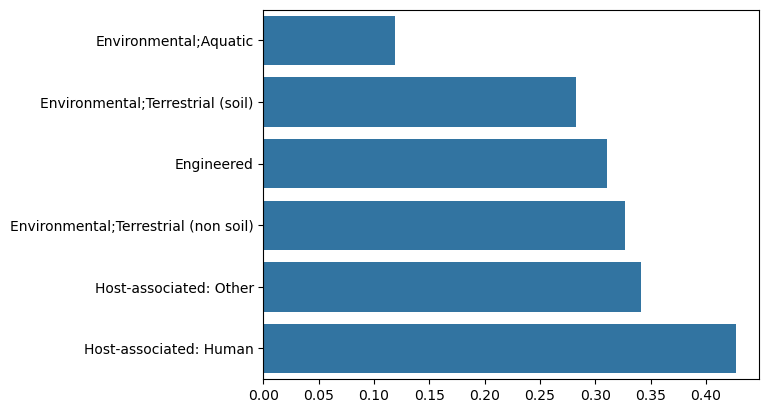

In [ ]:
sns.barplot(data=dict(sorted(ratios.items(), key=lambda item: item[1])), orient="h")